In [0]:
import torch
import math
import numpy as np
import torch.nn as nn
import scipy.stats as st
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.metrics import r2_score

# Q1
## Generating samples from the Auto-Regressive model equation.
\begin{equation}
  X(t) = a_1X(t-1)+a_2X(t-2)+a_3X(t-3)+U(t)\\
where \; U(t) \sim Uniform(0,0.1)),\;a_1 = 0.6,\;a_2 = -0.5,\;a_3 = -0.2.
\end{equation}

In [0]:
np.random.seed(4984)
SIZE=4000

In [0]:
def U():
  return np.random.normal(0,0.1)

In [0]:
samples = []
samples.append(U())
samples.append(U())
samples.append(U())

In [0]:
for i in range(SIZE):
  samples.append(U()+0.6*samples[-1]-0.5*samples[-2]-0.2*samples[-3])

### plotting Samples

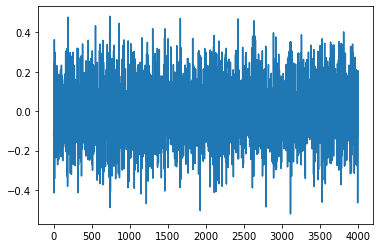

In [0]:
plt.plot(samples[:])
plt.show()

## Splitting into training and testing samples and processing data

In [0]:
bound=int(0.5*SIZE)
X_train = samples[:bound]
X_test  = samples[bound:]

In [0]:
def processing_data(dataset, seq_len):
	data_X, data_Y = [], []
	size=len(dataset)-1
	for i in range(size-seq_len):
		data_X.append(dataset[i:(i+seq_len)])
		data_Y.append(dataset[i + seq_len])
	return np.array(data_X), np.array(data_Y)

In [0]:
train_seq = processing_data(X_train, 3)
test_seq = processing_data(X_test, 3)

## Network Architecture

In [0]:
class Net(nn.Module):
  def __init__(self, dim_in=1, h=32, out=1,number_layer=1):
    super().__init__()
    self.h=h
    self.n=number_layer
    self.rnn = nn.RNN(dim_in, h,num_layers=number_layer,batch_first=True, nonlinearity='relu')
    self.l1 = nn.Linear(h, out)
    # self.init_hidden()
 
  # def init_hidden(self):
    # h_n of shape (num_layers * num_directions, batch, hidden_size)
    # self.hidden_cell = torch.zeros(self.n,1,self.h)

  def forward(self, x):
    l=len(x)
    x, _ = self.rnn(x)
    # print(l,x[:,-1].shape)
    x = self.l1(x[:,-1])
    return x.reshape(-1)

# Training 
## MODEL1 with 1 RNN layer

In [0]:
mse = nn.MSELoss()
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
m_loss=[]
print(model)

Net(
  (rnn): RNN(1, 32, batch_first=True)
  (l1): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
epochs = 500
for i in range(epochs):
  # for j in range(len(train_seq[0])):
    avg_loss=0.0
    optimizer.zero_grad()
    seq=torch.tensor(train_seq[0]).float()
    label=torch.tensor(train_seq[1]).float().reshape(-1)
    y_pred = model(seq.view(-1,3,1))
    # print(y_pred,label)
    # break
    loss = mse(y_pred, label)
    loss.backward()
    optimizer.step()
    avg_loss+=loss.item()
    m_loss.append(avg_loss)
    # print(f'epoch: {i:3} loss: {avg_loss:10.8f}')

# print(f'epoch: {i:3} loss: {loss.item():10.10f}')

### MSE Vs Epoch Curve for Model1

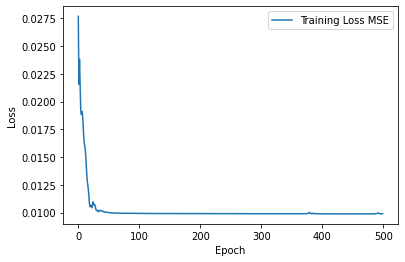

In [0]:
plt.plot(m_loss)
plt.legend(("Training Loss MSE",""))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## MODEL2 with 2 RNN layer

In [0]:
model2 = Net(number_layer=2)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
m2_loss=[]
print(model2)

Net(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (l1): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
for i in range(epochs):
  # for j in range(len(train_seq[0])):
    avg_loss=0.0
    optimizer2.zero_grad()
    seq=torch.tensor(train_seq[0]).float()
    label=torch.tensor(train_seq[1]).float().reshape(-1)
    y_pred = model2(seq.view(-1,3,1))
    # print(y_pred,label)
    # break
    loss = mse(y_pred, label)
    loss.backward()
    optimizer2.step()
    avg_loss+=loss.item()
    m2_loss.append(avg_loss)
    # print(f'epoch: {i:3} loss: {avg_loss:10.8f}')

# print(f'epoch: {i:3} loss: {loss.item():10.10f}')

### MSE Vs Epoch Curve for Model2

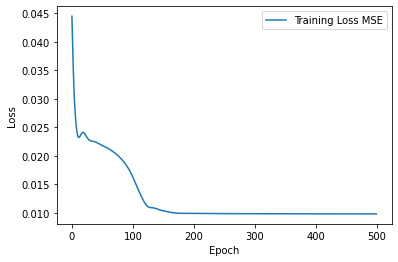

In [0]:
plt.plot(m2_loss)
plt.legend(("Training Loss MSE",""))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## MODEL3 with 3 RNN layer

In [0]:
model3 = Net(number_layer=2)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)
m3_loss=[]
print(model3)

Net(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (l1): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
for i in range(epochs):
  # for j in range(len(train_seq[0])):
    avg_loss=0.0
    optimizer3.zero_grad()
    seq=torch.tensor(train_seq[0]).float()
    label=torch.tensor(train_seq[1]).float().reshape(-1)
    y_pred = model3(seq.view(-1,3,1))
    # print(y_pred,label)
    # break
    loss = mse(y_pred, label)
    loss.backward()
    optimizer3.step()
    avg_loss+=loss.item()
    m3_loss.append(avg_loss)
    # print(f'epoch: {i:3} loss: {avg_loss:10.8f}')

# print(f'epoch: {i:3} loss: {loss.item():10.10f}')

### MSE Vs Epoch Curve for Model3

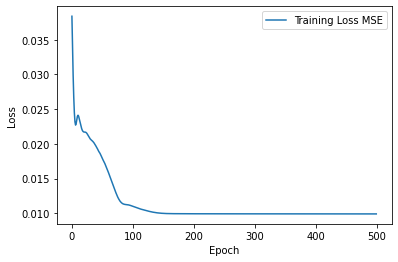

In [0]:
plt.plot(m3_loss)
plt.legend(("Training Loss MSE",""))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Testing 

In [0]:
tseq=torch.tensor(test_seq[0]).float()
tlabel=torch.tensor(test_seq[1]).float().reshape(-1)

## Predicting output

In [0]:
test1=model(tseq.view(-1,3,1))
test2=model2(tseq.view(-1,3,1))
test3=model3(tseq.view(-1,3,1))

In [0]:
mae = nn.L1Loss()

In [0]:
def report_loss(pred,target):
  f'epoch: {i:3} loss: {avg_loss:10.8f}'
  print(f'MSE: {mse(pred,target).item():10.8f}')
  print(f'MAE: {mae(pred,target).item():10.8f}')
  pred=pred.detach().numpy().reshape(-1)
  target=target.detach().numpy().reshape(-1)
  print(f'R2_SCORE: {r2_score(pred,target):12.8f}')

## MSE, MAE and R2 score on Test set for Model1.

In [0]:
print("Model with 1 RNN layer")
report_loss(test1,tlabel)

Model with 1 RNN layer
MSE: 0.01048982
MAE: 0.08079205
R2_SCORE:   0.15127506


## MSE, MAE and R2 score on Test set for Model2

In [0]:
print("Model with 2 RNN layer")
report_loss(test2,tlabel)

Model with 2 RNN layer
MSE: 0.01047123
MAE: 0.08074556
R2_SCORE:   0.15133801


## MSE, MAE and R2 score on Test set for Model2.

In [0]:
print("Model with 3 RNN layer")
report_loss(test3,tlabel)

Model with 3 RNN layer
MSE: 0.01044890
MAE: 0.08064404
R2_SCORE:   0.14967190


## Visualizing the output of all three Models on test data.

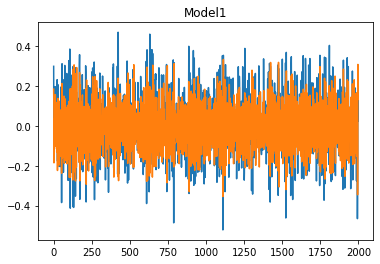

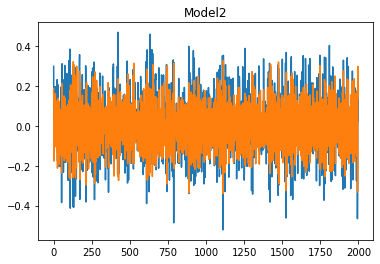

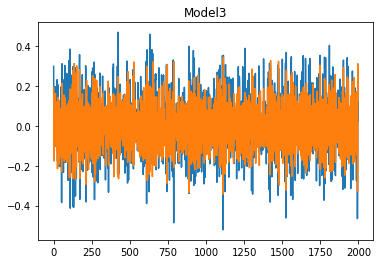

In [0]:
plt.plot(test_seq[1])
plt.plot(test1.detach().numpy())
plt.title("Model1")
plt.show()
plt.plot(test_seq[1])
plt.plot(test2.detach().numpy())
plt.title("Model2")
plt.show()
plt.plot(test_seq[1])
plt.plot(test3.detach().numpy())
plt.title("Model3")
plt.show()

## Observations
- We observe that there is no signifigant change in the accuray of prediction by adding additional RNN layers which is clearly visible from various metrics like MSE, MAE, R2_SCORE. This happen because the sequence(data) is simple, so we don't need a complex network to learn. 